# King County House Price Prediction

## Abstract:

Purpose of this research is to study about the supervised algorithms and to see how well they perform when they are given hyperparameters. The performance is measured by the accuracy to the predict the price of the house depending upon the hyperparameters used in the alogrithm. The supervised algorithms which are used to predict the housing prices are Random Forest Classifier, XGBoost Classifier, Logistic Regression, Random Forest Regression, XGBoost Regression, Linear Regression, Ridge Regression and SVM(Support Vector Machines). XGBoost Classifer proves to be effective with  an accuracy of 0.9091610 performs better than other supervised models with Random Forest Classifier with an accuracy of 0.902533 is very close than other supervised algorithms.

## Dataset:

King County House Price Prediction the data has been taken from a kaggle dataset https://www.kaggle.com/harlfoxem/housesalesprediction/home containing the house sale prices for King County also includes Seattle where the dataset of the housing prices is recorded from May 2014 to May 2015.

The dataset includes:
id - to have unique identification for each house with a series of number

date - date the house was sold

price - Prediction price of the house

bedrooms - no. of bedrooms in the house

bathrooms - no. of bathrooms in the house

spft_living - square footage of the living room

sqft_lot - square footage of the lot

waterfront - if the house has a waterfront view

view - how many times the house has been viewed by the buyers

condition - the condition of the house

grade - grade given to the house by depending upon the King County grading system

sqft_above - square footage of the house apart from the basement

sqft_basement - square footage of the basement of the house

yr_built - year the house was built

yr_renovatedYear - year the house was renovated

zipcode - zipcode of the house

lat - Latitude coordinate of the house 

long - Longitude coordinate of the house

sqft_living15 - Denotes the living room area in 2015(implies-- some renovations) and which might not have affected the lot size of the house 

sqft_lot15 - Denotes that lot size area in 2015(implies-- some renovations)

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline
import xlwt 
from xlwt import Workbook 

In [91]:
features = pd.read_csv('./Data/king_county_cleansed.csv')

In [92]:
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1') 

In [93]:
features.head() # Displays the first 5 rows of the data

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [94]:
features.describe() # Describes the numeric reperesentation of each column

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Multicollinearity:

We are using .corr() to find the coorelation between two columns to get sense of which two independent variables are dependent upon each other so that we can increase the accuracy of the model.

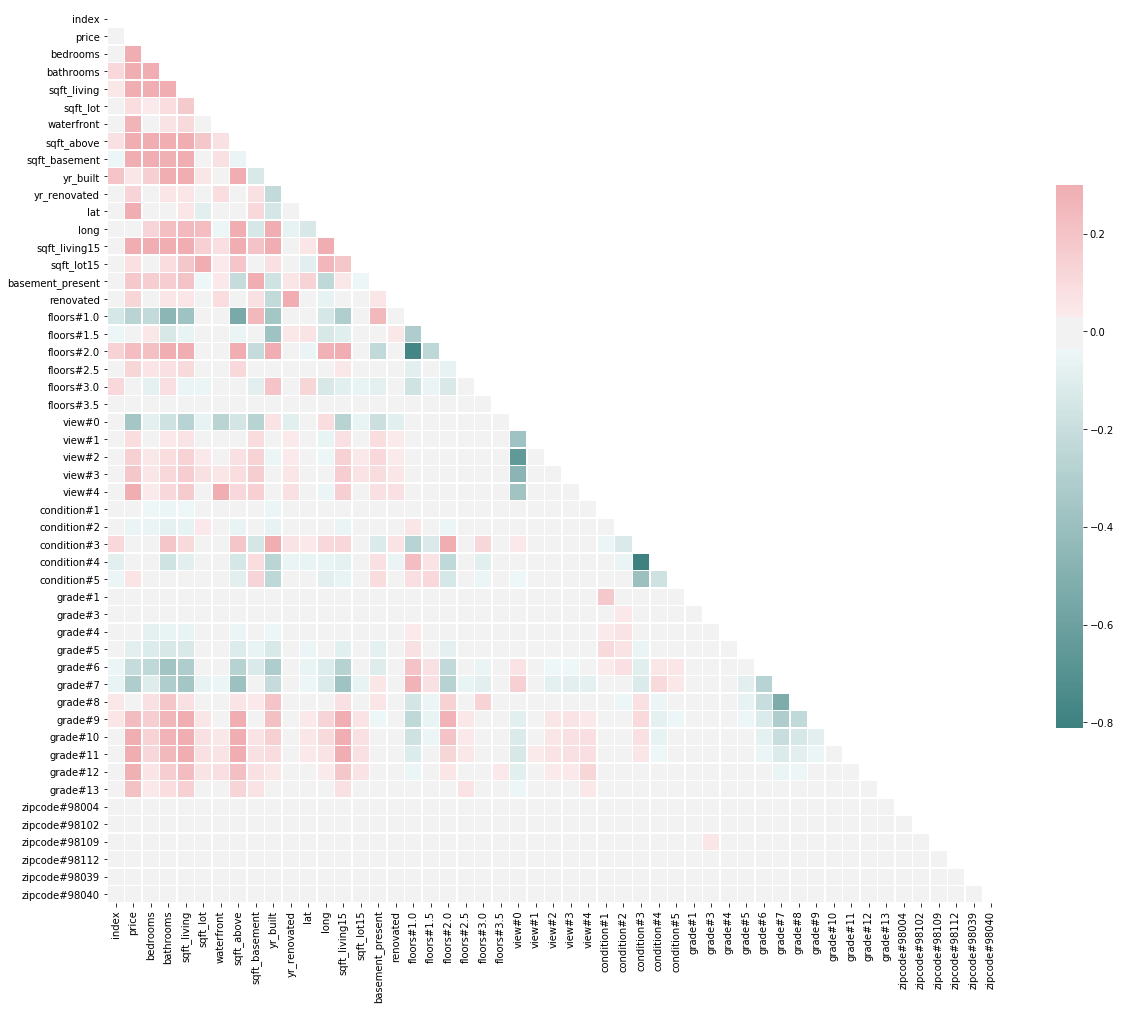

In [95]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool) # Returns an array of zeros
mask[np.triu_indices_from(mask)] = True   # Returns an array of upper-triangle values

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})   # Displays the heatmap showing how much the two independent variables are depedenet upon each other


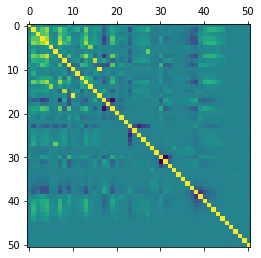

In [96]:
plt.matshow(features.corr())  # plt is the command to plot a graph using the matplot libaray

In [97]:
median_price = features.loc[:,"price"].median()   # Finding the median price of the houses
print(median_price)

450000.0


Creating a new column in the dataframe to hold the categorical data value : HIGH/LOW.

All values of the price of the house which are less than the median price are denoted as LOW and if it is greater than the median price are HIGH.

In [98]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [99]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [100]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


## Part A:



### Bagging Based Tree Algorithm : Random Forest Classifier

Random Forest Classifier is an ensemble algorithm of decision trees from randomly selected subset of training set. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects. For example, running prediction over Naive Bayes, SVM and Decision Tree and then taking vote for final consideration of class for test object.

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [103]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # The King County House Pricing data for the particular features is now copied to X

y=features['price_cat']  # The target data is now present in the y 
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Random Forest Classifier aggregates the votes from different decision treess to decide the final class of the object. This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results.

In [104]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train and fit the model using the tranning datasets
clf.fit(X_train,y_train)

# To predict the test data with the help of the training set
y_pred=clf.predict(X_test)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.898673658235657


In [106]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Feature Importance:

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

In [107]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.729890e-01
sqft_living         1.221608e-01
sqft_living15       8.982382e-02
sqft_above          7.446914e-02
long                5.476541e-02
sqft_lot15          5.193216e-02
yr_built            5.008180e-02
sqft_lot            4.977609e-02
bathrooms           4.372863e-02
grade#7             2.789750e-02
sqft_basement       2.627324e-02
bedrooms            1.716908e-02
grade#6             1.506575e-02
grade#9             1.395770e-02
grade#8             1.356235e-02
floors#1.0          1.100794e-02
view#0              9.256011e-03
basement_present    8.057016e-03
floors#2.0          5.825524e-03
condition#3         5.752856e-03
condition#4         4.666096e-03
grade#10            4.553420e-03
floors#1.5          3.953443e-03
condition#5         3.497043e-03
yr_renovated        2.944585e-03
view#2              1.905449e-03
renovated           1.879039e-03
view#3              1.502837e-03
view#4              1.416204e-03
zipcode#98004       1.339152e-03
waterfront

In [108]:
top_features = feature_imp.head(10)   # Displays the top 10 important feautres of the dataset
top_features

lat              0.272989
sqft_living      0.122161
sqft_living15    0.089824
sqft_above       0.074469
long             0.054765
sqft_lot15       0.051932
yr_built         0.050082
sqft_lot         0.049776
bathrooms        0.043729
grade#7          0.027898
dtype: float64

No handles with labels found to put in legend.


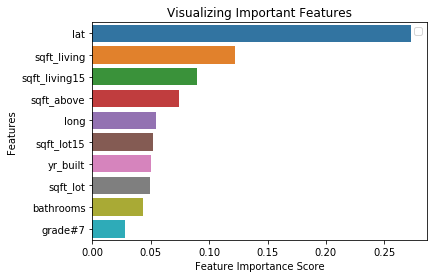

In [109]:
# Creating a bar plot for the important features
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [110]:
from pprint import pprint

In [111]:
# The parameters used by the current radnom forest classifier
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [112]:
from sklearn.model_selection import RandomizedSearchCV

### Important Hyperparameters are:

#### n_estimators  -
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. But adding more tress can reduce the training process.

##### max_depth -
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. Each decision tree ranges from 1 to 32 in depth to plot the training and test errors.

#### min_samples_split - 
min_samples_split represents the minimum number of samples required to split an internal node. It can vary between considering the least one sample at each node to considering all of the samples at each node. By increasing the parameter, each tree in the forest becomes more constrained as it starts to consider more samples at each node.

#### min_samples_leaf - 
min_samples_leaf is the minimum number of samples required to be at the leaf node. This parameter describes the minimum number of samples for the samples of the leafs to be present at the base of the tree.

#### max_features - 
max_features represents the number of features to consider when looking for the best split.

In [113]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [114]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_result = clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.7s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.5s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.6s
[CV] n_estimators=152, min_s

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.7s


[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   3.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   2.9s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, total=   7.3s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, total=   7.1s
[CV] n_estimators=152, min_samples_split=10, min_sa

[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.5s
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.3s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.6s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, 

[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=105, min_samples_split=10, min_sam

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, total=   7.4s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   4.0s
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, total=   7.5s
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   3.9s
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   3.9s
[CV] n_estimators=200, min_samples_s

[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   1.9s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.7s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_

[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   1.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   7.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   8.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   8.0s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   8.2s
[CV] n_estimators=105, min_samples_split=10, min_samp

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   5.7s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_featu

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


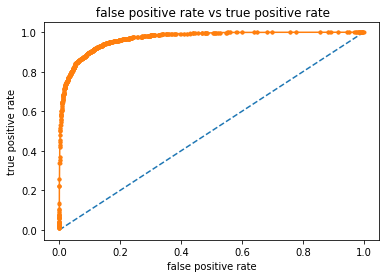

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = clf_result.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# labels
plt.title(" false positive rate vs true positive rate")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### ROC Curve 

ROC curve is used in  predicting the probability of a binary outcome of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.

In [116]:
clf_random.best_params_ # Display the best parameters for the random forest classifier

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [117]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [118]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [119]:
best_random = clf_random.best_estimator_   # Gives the best model fit from the random forest classifier

In [120]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test))) 

ROC for base model : 0.8891798453382839
ROC for best model : 0.8992914858417052


In [123]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model for the above hyperparameters
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [124]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   6.9s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   7.0s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   6.9s
[CV

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min


[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   2.9s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=   9.5s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   3.8s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=  10.9s
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   4.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV] bootstrap=True, max_features=

[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   2.8s
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=300, total=   8.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=300, total=   8.3s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   5.5s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_features=auto, min_samp

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [125]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [126]:
best_grid = grid_search.best_estimator_

In [127]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

roc_1 = str(evaluate(best_grid,X_train,y_train, X_test, y_test))

ROC for best grid search model : 0.8999084124662566


### Boosting Algorithm : XGBoost Classifier:

XGBoost Algorithm is an implementation of gradient boosted decision trees designed for execution speed and model performance. 


In [128]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score  # import the XGBoost Classifier

In [129]:
xgBoostClassifierModel = XGBClassifier()  # Training the data using the XGBoost model 
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [130]:
y_pred = xgBoostClassifierModel.predict(X_test)  # Predicting using the test data
predictions = [round(value) for value in y_pred]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
accuracy = accuracy_score(y_test, predictions)   # Evaluate the accuray of the predictions for the test data
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.24%


In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.220021 using {'n_estimators': 200}
-0.258780 (0.006000) with: {'n_estimators': 50}
-0.233351 (0.006859) with: {'n_estimators': 100}
-0.224575 (0.007561) with: {'n_estimators': 150}
-0.220021 (0.008576) with: {'n_estimators': 200}


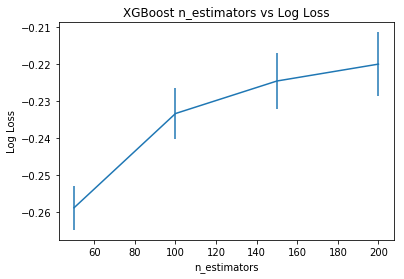

In [133]:
model = XGBClassifier()
n_estimators = range(50, 250, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss') # Tune the Size of Decision Trees in XGBoost
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=200 resulting in a log loss of -0.2187912, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 200 if we plot the results.



### Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [134]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


Best: -0.207861 using {'max_depth': 7}
-0.331806 (0.005540) with: {'max_depth': 1}
-0.233351 (0.006859) with: {'max_depth': 3}
-0.213986 (0.009817) with: {'max_depth': 5}
-0.207861 (0.010570) with: {'max_depth': 7}
-0.212351 (0.010743) with: {'max_depth': 9}


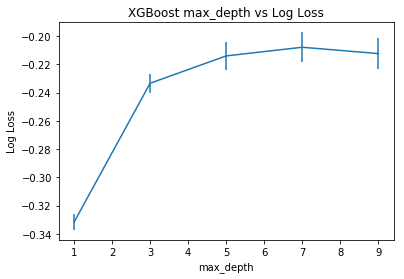

In [135]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=7, it is interesting to note that there was practically little difference between using max_depth=5 or max_depth=9.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (50, 100, 75, 30) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4410 or 160 models will be trained and evaluated.

In [136]:
# grid search
model = XGBClassifier()
n_estimators = [50, 100, 75, 30]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.7min finished


Best: -0.207861 using {'max_depth': 7, 'n_estimators': 100}
-0.219971 (0.008014) with: {'max_depth': 6, 'n_estimators': 50}
-0.209488 (0.010017) with: {'max_depth': 6, 'n_estimators': 100}
-0.212580 (0.009080) with: {'max_depth': 6, 'n_estimators': 75}
-0.241240 (0.006596) with: {'max_depth': 6, 'n_estimators': 30}
-0.215250 (0.007947) with: {'max_depth': 7, 'n_estimators': 50}
-0.207861 (0.010570) with: {'max_depth': 7, 'n_estimators': 100}
-0.209898 (0.009382) with: {'max_depth': 7, 'n_estimators': 75}
-0.234287 (0.006310) with: {'max_depth': 7, 'n_estimators': 30}
-0.214193 (0.008826) with: {'max_depth': 8, 'n_estimators': 50}
-0.210602 (0.010943) with: {'max_depth': 8, 'n_estimators': 100}
-0.210917 (0.010306) with: {'max_depth': 8, 'n_estimators': 75}
-0.230824 (0.006830) with: {'max_depth': 8, 'n_estimators': 30}
-0.214469 (0.008979) with: {'max_depth': 9, 'n_estimators': 50}
-0.212351 (0.010743) with: {'max_depth': 9, 'n_estimators': 100}
-0.212280 (0.010081) with: {'max_depth':

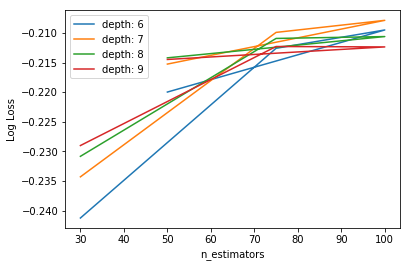

In [137]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=100 and max_depth=9, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=100, max_depth=9).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation is left as an exercise you could explore yourself.

### Creating the model with the best values for Hyper parameters

In [138]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [139]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [140]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [141]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))
roc_2=str(evaluate(model, X_train,y_train, X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ROC for the XGBoost model is: 0.9121069852002309


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### We Got a better ROC value for XGBoost model than the Random Forest Classifier algorithm 

## Part B:

### Classification with Logistic Regression

In [142]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [143]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [144]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

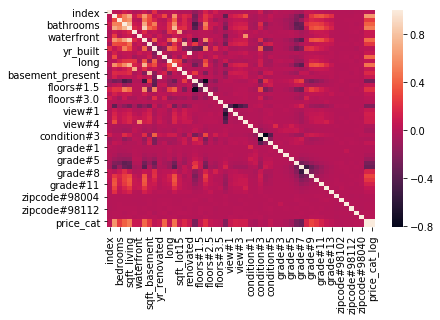

In [145]:
sns.heatmap(features.corr())

In [146]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [147]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [148]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


In [149]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        22:41:22   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

Looking at the Z-score the sqft_living is the most independent variable and followed by the yr_built and the rest.

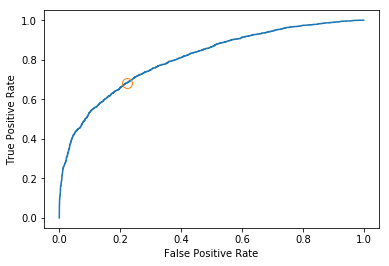

In [150]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [151]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

roc_3 = metrics.auc(falsepos, truepos)

#### The AUC score for the Logistic Regression is lower when compared to the Part A models

## Part C:

### Regression with Trees

### Bagging Based Tree Algorithm : Random Forest Classifier



In [152]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [153]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

#### Random Search Cross Validation in Scikit-Learn

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [154]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [155]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   2.5s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   2.6s
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   2.7s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=152, min_s

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.9s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, total=   3.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6, total=   3.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  10.7s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  10.8s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  10.6s
[CV] n_estimators=152, min_samples_split=10, min

[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.3s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.3s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2, total=   0.4s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, ma

[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, total=   3.5s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, total=   3.4s
[CV] n_estimators=105, min_samples_split=10, min_sam

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, total=  48.5s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min


[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  22.4s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=  21.4s
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, total=  46.0s
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, total=  46.1s
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=200, min_samples_spli

[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.7s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.7s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   2.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, ma

[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   8.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   3.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   4.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   3.9s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=6, total=  10.3s
[CV] n_estimators=105, min_samples_split=10, min_samp

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.6s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.7s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.7s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, total=   2.4s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [156]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 74000.6666 degrees.
Accuracy = 86.26%.


In [157]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [158]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 69304.3879 degrees.
Accuracy = 87.07%.


### Grid Search with Cross Validation

In [159]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 150, 200, 180]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [160]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.7s
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.7s
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1

[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.7s


[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=180, total=   3.8s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.0s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=180, total=   4.0s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_fe

[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   2.5s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=180, total=   2.1s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.1s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=180, total=   2.2s
[CV] bootstrap=True, max_depth=None, max_fea

[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   2.3s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   2.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   2.2s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=180, total=   2.0s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_fe

[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=150, total=   2.9s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   3.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   3.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   3.6s
[CV] bootstrap=True, max_depth=None, max_fea

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min


[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=180, total=   2.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=180, total=   3.0s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_fe

[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=180, total=   2.6s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=180, total=   2.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=None, max_fea

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180, total=   3.7s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.1s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=180, total=   3.7s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=Non

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=150, total=   2.5s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=Non

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=150, total=   2.4s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=150, total=   2.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=150, total=   2.3s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.9s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=180 
[CV]  bootstrap=False, max_depth=Non

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   2.7s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   2.6s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   4.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=150, total=   4.1s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=Non

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.9min


[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=180, total=   4.8s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, total=   2.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=180, total=   4.6s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=Non

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   4.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=180, total=   3.9s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   2.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=180, total=   3.9s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=Non

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   4.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   3.9s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=180 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   4.0s
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=180, total=   3.6s
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=180, total=   2.9s
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=180, total=   2.4s


[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  6.1min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [161]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [162]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)
roc_4 = grid_accuracy

Model Performance
Average Error: 89760.1261 degrees.
Accuracy = 82.63%.


### XGBoost Regression Algorithm (eXtreme Gradient Boosting)

In [163]:
from xgboost import XGBRegressor

In [164]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 79615.0745 degrees.
Accuracy = 84.92%.


In [165]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Best: 0.702213 using {'n_estimators': 200}
0.678271 (0.009226) with: {'n_estimators': 50}
0.691425 (0.008511) with: {'n_estimators': 100}
0.697196 (0.008360) with: {'n_estimators': 150}
0.702213 (0.008356) with: {'n_estimators': 200}


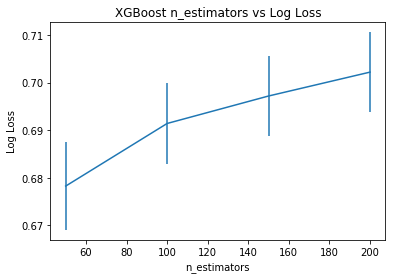

In [166]:
model = XGBRegressor()
n_estimators = range(50, 250, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss') # Tune the Size of Decision Trees in XGBoost
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=200 resulting in a log loss of -0.200312, but really not a significant difference from n_estimators=150. In fact, there is not a large relative difference in the number of trees between 50 and 200 if we plot the results.

### Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [167]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


Best: 0.844663 using {'max_depth': 5}
0.657198 (0.041209) with: {'max_depth': 1}
0.810671 (0.030810) with: {'max_depth': 3}
0.844663 (0.032456) with: {'max_depth': 5}
0.839380 (0.038641) with: {'max_depth': 7}
0.835827 (0.038532) with: {'max_depth': 9}


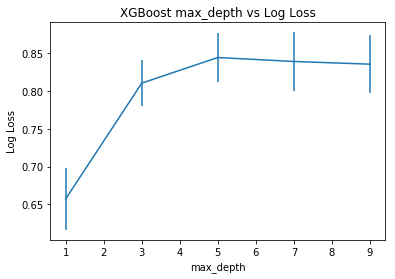

In [168]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between max_depth=5 and max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (50,100,150,200) and 4 different max_depth values (4,5,6,7) and each combination will be evaluated using 10-fold cross validation.

In [169]:
# grid search
model = XGBRegressor()
n_estimators = [50,100,150,200]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 10.5min finished


Best: 0.733227 using {'max_depth': 7, 'n_estimators': 100}
0.703784 (0.007598) with: {'max_depth': 4, 'n_estimators': 50}
0.712436 (0.007923) with: {'max_depth': 4, 'n_estimators': 100}
0.716787 (0.008999) with: {'max_depth': 4, 'n_estimators': 150}
0.718928 (0.008811) with: {'max_depth': 4, 'n_estimators': 200}
0.718037 (0.007883) with: {'max_depth': 5, 'n_estimators': 50}
0.723844 (0.008501) with: {'max_depth': 5, 'n_estimators': 100}
0.725700 (0.008632) with: {'max_depth': 5, 'n_estimators': 150}
0.726046 (0.008341) with: {'max_depth': 5, 'n_estimators': 200}
0.727453 (0.009123) with: {'max_depth': 6, 'n_estimators': 50}
0.731183 (0.010458) with: {'max_depth': 6, 'n_estimators': 100}
0.731361 (0.010912) with: {'max_depth': 6, 'n_estimators': 150}
0.731289 (0.010497) with: {'max_depth': 6, 'n_estimators': 200}
0.732018 (0.008292) with: {'max_depth': 7, 'n_estimators': 50}
0.733227 (0.008468) with: {'max_depth': 7, 'n_estimators': 100}
0.732461 (0.008218) with: {'max_depth': 7, 'n_est

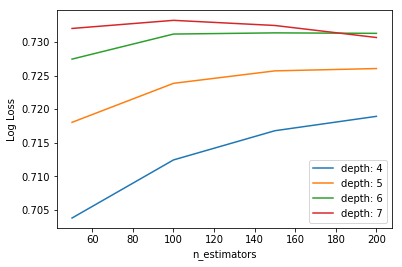

In [170]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=200 and max_depth=7, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=200, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation is left as an exercise you could explore yourself.

#### Creating the model with the best values for Hyper parameters

In [171]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [172]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)
roc_5= best_accuracy

Model Performance
Average Error: 67194.5532 degrees.
Accuracy = 87.42%.


#### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

The accuracy of the XGBoost Regression is not better thean the Part A models.

## Part D:

### Regression Models 

Linear Regression:


In [173]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [174]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 125845.11


In [175]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 119696.72


In [176]:
#Linear regression - multiple linear regression model from previous assignment
print('Linear regression best model from Assignment 3: ' + str(205986.42))

Linear regression best model from Assignment 3: 205986.42


In [177]:
from sklearn import linear_model

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train_reg, y_train_reg)

# Print the coefficients
print (results.intercept_, results.coef_)

-35221581.61114453 [-1.89740445e+04  4.04201375e+04  8.17926183e+01  1.17691474e-01
  5.01479970e+05  5.39560902e+01  2.78348496e+01 -1.83835359e+03
  3.54094502e+03  5.82818313e+05 -9.58838264e+04  3.63686484e+01
 -4.10670398e-01  1.31346356e+04 -6.98891883e+06 -5.16472972e+04
 -4.28381657e+04 -4.62075546e+04  7.99981149e+04 -2.16606938e+03
  6.28609719e+04 -1.06376434e+05  9.58950675e+02 -3.34927465e+04
  1.30630811e+04  1.25847149e+05 -7.30620447e+04 -6.02945614e+03
 -1.68217112e+04  2.40732222e+04  7.18399899e+04 -2.76910351e+05
 -2.44983358e+05 -3.97147238e+05 -4.31586029e+05 -3.99945391e+05
 -3.56825220e+05 -2.94367599e+05 -1.83038198e+05 -2.07731166e+04
  2.51781729e+05  6.55914502e+05  1.69788027e+06  1.73768039e+03
 -6.92644095e+03 -2.73077534e+04 -1.66753380e+04 -5.76225300e+04
 -4.35974650e+04]


In [178]:
y_pred = model.predict(X_test_reg)

In [179]:
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(model.score(X_test_reg, y_test_reg)))
roc_6 = model.score(X_test_reg, y_test_reg)

Accuracy of linear regression classifier on test set: 0.73


### Ridge Regression : 

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. As ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

In [180]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) # 
rr.fit(X_train_reg, y_train_reg) # restricted and in this case linear and ridge regression resembles
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

The higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely restricted. In this case linear and ridge regression resembles the comparison with the alpha value.

ridge regression train score low alpha: 0.725152515952371
ridge regression test score low alpha: 0.733879527022287
ridge regression train score high alpha: -2.1902662626165936
ridge regression test score high alpha: -2.1080396901192637


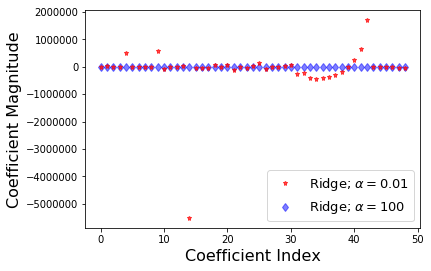

In [185]:
Ridge_train_score = rr.score(X_train_reg,y_train_reg)
Ridge_test_score = rr.score(X_test_reg, y_test_reg)
Ridge_train_score100 = rr100.score(X_train_reg,y_train_reg)
Ridge_test_score100 = rr100.score(X_test_reg, y_test_reg)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

The lower the constraint (low lambda value of 0.01) on the features, the model will resemble the linear regression model with the same accuray of that of the linear regression.

### Part E :
#### SVM(Support Vector Machine)

A Support Vector Machine is a supervised machine learning algorithm which can be used for both classification and regression problems. It follows a technique called the kernel trick to transform the data and based on these transformations, it finds an optimal boundary between the possible outputs.

In [186]:
from sklearn.svm import SVC  # Import the SVC from the scikitlearn

#### Parameters for the SVM:

sklearn.svm.SVC (C=1.0, kernel=’rbf’, degree=3, gamma=’auto’)


C: It is the regularization parameter, C, of the error term.

kernel: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.

degree: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.

gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.

In [187]:
svclassifier = SVC(kernel ='rbf')  # SVM Classifier for the classification problem 
svclassifier.fit(X_train, y_train)  # Training the data using SVM Classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [188]:
y_pred = svclassifier.predict(X_test)  # SVM Classifier to predict the data

In [189]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3247   15]
 [3202   20]]
             precision    recall  f1-score   support

         -1       0.50      1.00      0.67      3262
          1       0.57      0.01      0.01      3222

avg / total       0.54      0.50      0.34      6484



In [190]:
print('Accuracy of SVM classifier on training set: {:.2f}'   # Accuracy of the SVM Classifier
     .format(svclassifier.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svclassifier.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.50


In [191]:
kernel = ['rbf', 'sigmoid']

random_grid = {'kernel' : kernel}
pprint(random_grid)

{'kernel': ['rbf', 'sigmoid']}


In [192]:
from sklearn.model_selection import GridSearchCV

clf_base = SVC()
clf_random = GridSearchCV(estimator = clf_base, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] kernel=sigmoid ..................................................
[CV] ................................... kernel=sigmoid, total=  26.2s
[CV] kernel=sigmoid ..................................................
[CV] ....................................... kernel=rbf, total=  36.7s
[CV] kernel=sigmoid ..................................................
[CV] ....................................... kernel=rbf, total=  41.9s


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   54.0s remaining:   54.0s


[CV] ....................................... kernel=rbf, total=  49.5s
[CV] ................................... kernel=sigmoid, total=  22.5s
[CV] ................................... kernel=sigmoid, total=  18.6s


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf', 'sigmoid']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=2)

In [193]:
clf_random.best_params_

{'kernel': 'rbf'}

In [194]:
best_grid = clf_random.best_estimator_

In [195]:
roc_7 = str(evaluate(best_grid,X_train,y_train, X_test, y_test))
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.5008044593785598


## Conculsion:

By analysing the data using various supervised algorithms we could predict the selling price for the house where each alogrithm was passed with different parameters to give out different prediction scores. XGBoost Classifier performed well with an accuracy of 0.9091610 than the other supervised algorithms with comparison to the accuracy of each algorithm.


In [198]:
print("1. Accuracy of Random Forest Classifier Algorithm", roc_1)
print("2. Accuracy of XGBoost Classifier", roc_2)
print("3. Accuracy of Logistic Regression", roc_3)
print("4. Accuracy of Random Forest Regression Algorithm", roc_4)
print("5. Accuracy of XGBoost Regression", roc_5)
print("6. Accuracy of Linear Regression", roc_6)
print("7. Accuracy of Lasso Regression", Ridge_test_score)
print("8. Accuracy of SVM Classifier", roc_7)

1. Accuracy of Random Forest Classifier Algorithm 0.9012936429916792
2. Accuracy of XGBoost Classifier 0.9121069852002309
3. Accuracy of Logistic Regression 0.8078695178147917
4. Accuracy of Random Forest Regression Algorithm 82.62908751288145
5. Accuracy of XGBoost Regression 87.41571965700818
6. Accuracy of Linear Regression 0.7340052587384369
7. Accuracy of Lasso Regression 0.733879527022287
8. Accuracy of SVM Classifier 0.5008044593785598


## Contributions statement:

I have conributed to this assignment by rewriting the several forms of the code and corrected the ways of the analysing the data. Edited a few hyperparameters to make the Classification and Regression model to perform even better at a short period of time. By adding the Linear Regression, Lasso Regresssion and SVM could evaluate how well the Random Forest Algorithms and the XGBoost Algorithms perform better than the Regression and Classification models.

## Citation: 

https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://github.com/nikbearbrown/CSYE_7245/blob/master/Assignments/Assignment_1_Properly_Format_and_Explain.ipynb

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/

https://www.hackerearth.com/blog/machine-learning/simple-tutorial-svm-parameter-tuning-python-r/

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

## License :

Copyright (c) 2019 Johail Sherieff

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.